### Δεδομένα

Source: https://finance.yahoo.com/

### Λίγες πληρφορίες για αυτά:

Περιέχουν τις πληροφορίες του goog ανά λεπτό.


Επίσης η πληροφορία που μας ενδιαφέρει είναι το close του goog. Το close είναι η τιμή που διαμορφόθηκε εκείνη τη στιγμή στο goog. Το volume είναι η ποσότητα που αγοράστηκε/πουλήθηκε εκείνη τι στιγμή. 

'Αρα στην ουσία το close είναι η τιμή ενός goog που συναλλάχθηκε εκέίνη τη στιγμή και το volume είναι η ποσότητα που συναλλάχθηκε.

Το open είναι η τιμή που άνοιξε στο goog, το low είναι η χαμηλότερη τιμή πώλησης του ανοίγματος και το high η ηψυλότερη τιμή

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import mplfinance as mpf
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from sklearn.preprocessing import MinMaxScaler
import random
import time
import copy
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, LSTM, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
import tensorflow as tf
%matplotlib inline

## Import data

In [2]:
goog_input_df  = pd.read_csv("GOOG.csv", parse_dates=["Date"], nrows=1440)
goog_input_df = goog_input_df.rename(columns={"Date": "time", "Close": "close", "Low":"low", "High":"high", "Volume":"volume"}).copy().drop(columns=["Adj Close"])

goog_input_df.head()

,time,Open,high,low,close,volume
0,2017-03-27,806.950012,821.630005,803.369995,819.510010,1894300
1,2017-03-28,820.409973,825.989990,814.026978,820.919983,1620500
2,2017-03-29,825.000000,832.765015,822.380005,831.409973,1786300
3,2017-03-30,833.500000,833.679993,829.000000,831.500000,1055300
4,2017-03-31,828.969971,831.640015,827.390015,829.559998,1401900


In [3]:
goog_input_df = goog_input_df.set_index('time')
goog_input_df.head()

,Open,high,low,close,volume
time,,,,,
2017-03-27,806.950012,821.630005,803.369995,819.510010,1894300
2017-03-28,820.409973,825.989990,814.026978,820.919983,1620500
2017-03-29,825.000000,832.765015,822.380005,831.409973,1786300
2017-03-30,833.500000,833.679993,829.000000,831.500000,1055300
2017-03-31,828.969971,831.640015,827.390015,829.559998,1401900


In [4]:
goog_input_df = goog_input_df.sort_index()
goog_input_df.head()

,Open,high,low,close,volume
time,,,,,
2017-03-27,806.950012,821.630005,803.369995,819.510010,1894300
2017-03-28,820.409973,825.989990,814.026978,820.919983,1620500
2017-03-29,825.000000,832.765015,822.380005,831.409973,1786300
2017-03-30,833.500000,833.679993,829.000000,831.500000,1055300
2017-03-31,828.969971,831.640015,827.390015,829.559998,1401900


In [5]:
print(goog_input_df.shape)
print("------------------------")
print(goog_input_df.info())

(1259, 5)
------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2017-03-27 to 2022-03-24
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1259 non-null   float64
 1   high    1259 non-null   float64
 2   low     1259 non-null   float64
 3   close   1259 non-null   float64
 4   volume  1259 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 59.0 KB
None


In [6]:
goog_input_df.head()

,Open,high,low,close,volume
time,,,,,
2017-03-27,806.950012,821.630005,803.369995,819.510010,1894300
2017-03-28,820.409973,825.989990,814.026978,820.919983,1620500
2017-03-29,825.000000,832.765015,822.380005,831.409973,1786300
2017-03-30,833.500000,833.679993,829.000000,831.500000,1055300
2017-03-31,828.969971,831.640015,827.390015,829.559998,1401900


In [7]:
goog_input_df.tail()

,Open,high,low,close,volume
time,,,,,
2022-03-18,2677.679932,2738.270020,2658.639893,2736.030029,2291100
2022-03-21,2736.949951,2751.649902,2692.229980,2729.570068,1331600
2022-03-22,2730.000000,2830.000000,2730.000000,2805.550049,1488800
2022-03-23,2782.770020,2800.500000,2763.330078,2770.070068,1265100
2022-03-24,2785.449951,2827.929932,2760.788086,2826.239990,1026100


## Plot informations

<AxesSubplot:title={'center':'goog Price'}, xlabel='time'>

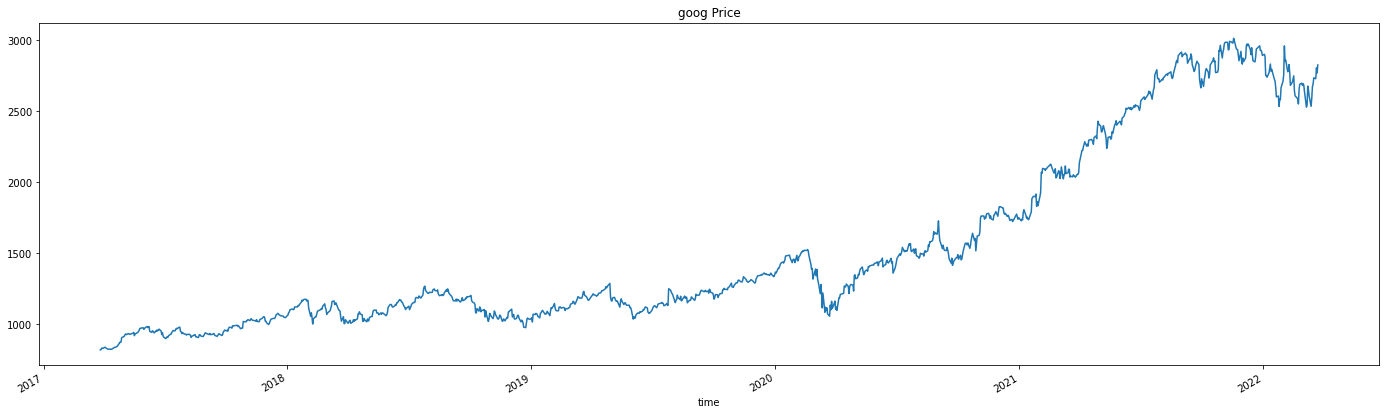

In [8]:
goog_input_df.close.plot(figsize=(24,7), title="goog Price")

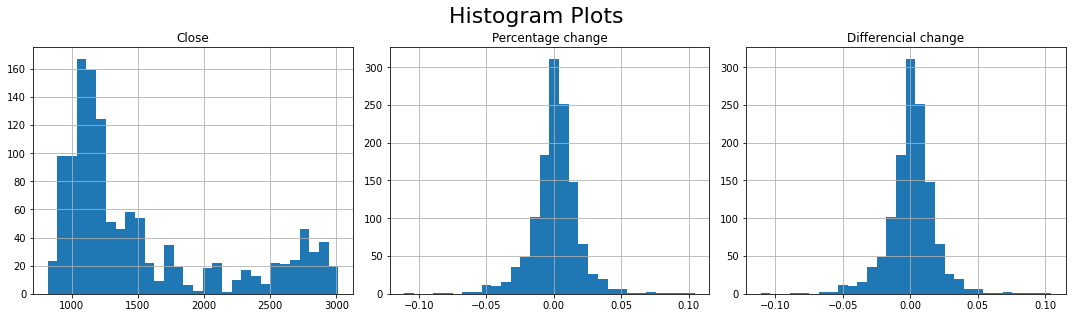

In [9]:
# ιστογράμματα 
plt.figure(figsize=(15,12))
plt.suptitle('Histogram Plots', fontsize=22)

plt.subplot(3,3,1)
goog_input_df.close.hist(bins=30)
plt.title('Close')

plt.subplot(3,3,2)
goog_input_df.close.pct_change().hist(bins=30)
plt.title('Percentage change')

plt.subplot(3,3,3)
goog_input_df.close.pct_change().hist(bins=30)
plt.title('Differencial change')

plt.tight_layout()

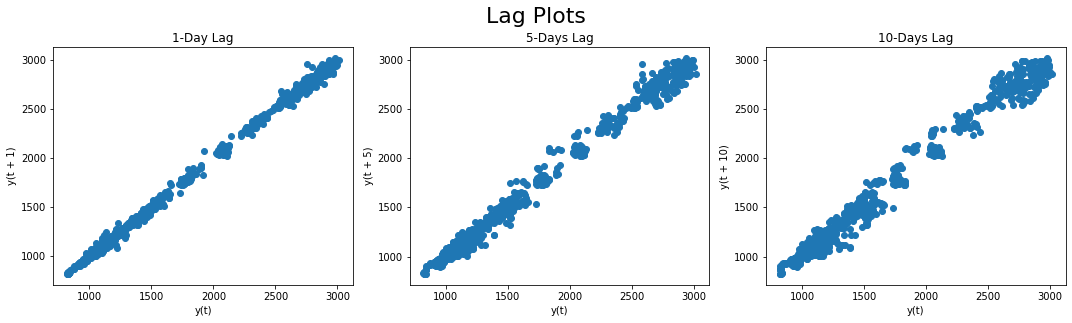

In [10]:
# κάνουμε plot το corelation 
plt.figure(figsize=(15,12))
plt.suptitle('Lag Plots', fontsize=22)

plt.subplot(3,3,1)
pd.plotting.lag_plot(goog_input_df['close'], lag=1) #minute lag
plt.title('1-Day Lag')

plt.subplot(3,3,2)
pd.plotting.lag_plot(goog_input_df['close'], lag=5) 
plt.title('5-Days Lag')

plt.subplot(3,3,3)
pd.plotting.lag_plot(goog_input_df['close'], lag=10) 
plt.title('10-Days Lag')

plt.tight_layout()

## Pre processing data for LSTM model

In [11]:
goog_closing_price = goog_input_df['close'].copy()
goog_closing_price.head()

time
2017-03-27    819.510010
2017-03-28    820.919983
2017-03-29    831.409973
2017-03-30    831.500000
2017-03-31    829.559998
Name: close, dtype: float64

In [12]:
df_train= goog_closing_price[:-200].copy()
df_test= goog_closing_price[-200:].copy()

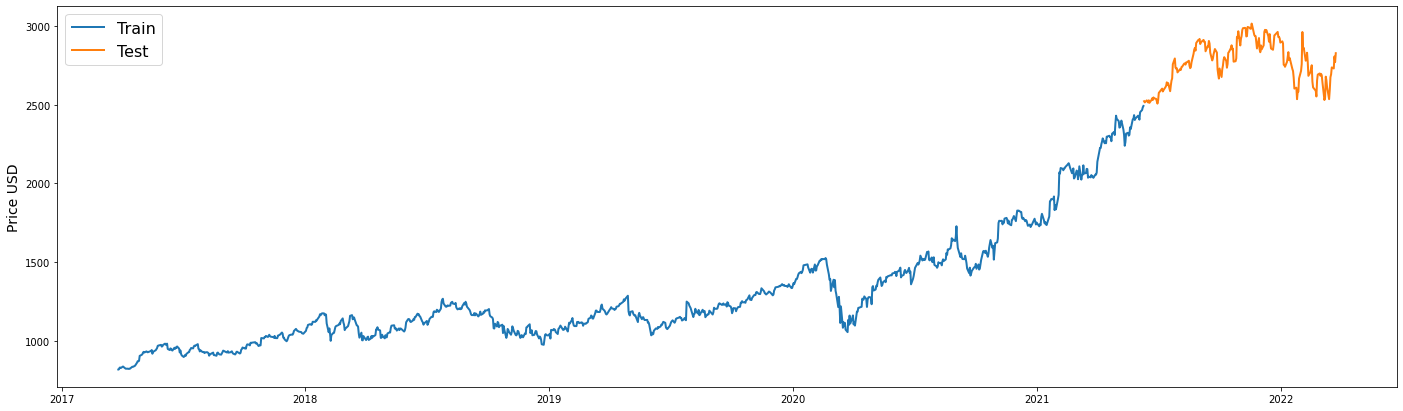

In [13]:
fig, ax = plt.subplots(1, figsize=(24, 7))
ax.plot(df_train, label='Train', linewidth=2)
ax.plot(df_test, label='Test', linewidth=2)
ax.set_ylabel('Price USD', fontsize=14)
ax.set_title('', fontsize=16)
ax.legend(loc='best', fontsize=16)

In [14]:
df_train= df_train.values.reshape(df_train.shape[0],1)
df_test= df_test.values.reshape(df_test.shape[0],1)

In [15]:
df_train.shape

(1059, 1)

In [16]:
"""
Ο λόγος που χωρίζουμε πρώτα τα δεδομένα μας και μετά τα κανονικοποιούμε
είναι διότι αν κάναμε το αντίθετο, όταν θα γινόταν το scaling, θα χρησιμοποιούνταν
(ως σημείο αναφοράς) τα δεδομένα που έχουμε ως training και αυτό θα επηρέαζε τα δεδομένα εκαπίδευσης.
Στην ουσία θα είχαμ "διαρροή" των αποτελεσμάτων του training set
"""
scaler_train = MinMaxScaler(feature_range=(0, 1))
scaled_train = scaler_train.fit_transform(df_train)

scaler_test = MinMaxScaler(feature_range=(0, 1))
scaled_test = scaler_test.fit_transform(df_test)

In [17]:
"""
Θα δημιουργήσουμε μια συνάρτηση που θα χωρίζει το datest σε input που θα δέχεται
το μοντέλο και τα label που πρέπει να προβλέπει.

Για παράδειγμα αν τα δεδομένα μας είχαν την μορφή [1, 2, 3, 4, 5, 6]
τότε τα input που θα παίρνει το μοντέλο μας και το αντίστοιχο output , θα ήταν κάπως έτσι:

Input | Output
1, 2      3
2, 3      4
3, 4      5
4, 5      6


Τα LSTMs δέχονται σαν είσοδο δεδομένα 2 διαστάσεων.
Η πρώτη διάσταση είναι ο αριθμός των χρονικών βημάτων, στο παράδειγμα μας είναι 2,
και η δεύτερη διάσταση είναι ο αριθμός των παρατηρήσεων ανά χρονικό βήμα, στο παράδειγμα είναι 1

"""
def dataset_generator_lstm(dataset, look_back=10):
    """
    Συνάρτηση που επιστρέφει όσα περιγράψαμε παραπάνω. Η παράμετρος
    look back προσδιορίζει πόσα προηγούμενα timesteps θα λάβουμε υπόψη
    για να προβλέψουμε το επόμενο timestep.
    Για παράδειγμα αν θέλουμε να προβλέψουμε τι θα γίνει την χρονική στιγμή t+1 (όπου t είναι η τωρινη
    χρονική στιγμή.) με look back ίσο με 10 , τότε θα χρησιμοποιουθούν τα δεδομένα της χρονική στιγμής
    t-9 , t-8, ... , t-1, t-0
    """    
    dataX, dataY = [], []
    
    for i in range(len(dataset) - look_back):   
        window_size_x = dataset[i:(i + look_back)]
        dataX.append(window_size_x)
        dataY.append(dataset[i + look_back])
        
    return np.array(dataX), np.array(dataY)

trainX, trainY = dataset_generator_lstm(scaled_train)
testX, testY = dataset_generator_lstm(scaled_test)

print("trainX: ", trainX.shape)
print("trainY: ", trainY.shape)
print("testΧ: ", testX.shape)
print("testY", testY.shape)

trainX:  (1049, 10, 1)
trainY:  (1049, 1)
testΧ:  (190, 10, 1)
testY (190, 1)


Για το LSTM πρέπει να αναδιαμορφώσoyme την είσοδο ώστε να είναι ένας τρισδιάστατος πίνακας 
[δείγματα , χρονικά βήματα, χαρακτηριστικά]
Δείγματα (Samples): Είναι το len(trainX) , δηλαδή η ποσότητα των data points που έχουμε
Χαρακτηριστικά (Features): Η ποσότητα των χαρακτηριστικών σε κάθε timestep. Στην συγκεκριμένη περίπτωση το χαρακτηριστικό που έχουμε είναι η τιμή του goog.  

In [18]:
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1 ))

print("Shape of trainX: ", trainX.shape)
print("Shape of testX: ", testX.shape)

Shape of trainX:  (1049, 10, 1)
Shape of testX:  (190, 10, 1)


## Create LSTM model

In [19]:
model = Sequential()

# model.add(LSTM(units = 32, activation = 'relu', return_sequences=True, input_shape = (trainX.shape[1], trainX.shape[2])))
# model.add(Dropout(0.2))

model.add(LSTM(units = 32, activation = 'relu', return_sequences=False, input_shape = (trainX.shape[1], trainX.shape[2])))
model.add(Dropout(0.2))

# model.add(LSTM(units = 64, activation = 'relu', return_sequences=True, input_shape = (trainX.shape[1], trainX.shape[2])))
# model.add(Dropout(0.2))

# model.add(LSTM(units = 64, activation = 'relu', return_sequences=True, input_shape = (trainX.shape[1], trainX.shape[2])))
# model.add(Dropout(0.2))

# model.add(LSTM(units = 64, input_shape = (trainX.shape[1], trainX.shape[2])))
# model.add(Dropout(0.2))

model.add(Dense(units = 1))

In [20]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
checkpoint_path = f'./models/best_model_{int(time.time())}.hdf5'
checkpoint = ModelCheckpoint(filepath=checkpoint_path, 
                             monitor='val_loss',
                             verbose=1, 
                             save_best_only=True,
                             mode='min')

earlystopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
callbacks = [checkpoint, earlystopping]
history = model.fit(trainX, trainY, batch_size = 32, epochs = 100, 
                    verbose=1, shuffle=False, 
                    validation_split=0.2, callbacks=callbacks)

Epoch 1/100
16/27 [================>.............] - ETA: 0s - loss: 0.0128 
Epoch 00001: val_loss improved from inf to 0.14622, saving model to ./models\best_model_1648236457.hdf5
27/27 [==============================] - 1s 12ms/step - loss: 0.0172 - val_loss: 0.1462
Epoch 2/100
18/27 [===================>..........] - ETA: 0s - loss: 0.0019
Epoch 00002: val_loss improved from 0.14622 to 0.06385, saving model to ./models\best_model_1648236457.hdf5
27/27 [==============================] - 0s 5ms/step - loss: 0.0034 - val_loss: 0.0638
Epoch 3/100
19/27 [====================>.........] - ETA: 0s - loss: 0.0041
Epoch 00003: val_loss improved from 0.06385 to 0.06175, saving model to ./models\best_model_1648236457.hdf5
27/27 [==============================] - 0s 4ms/step - loss: 0.0053 - val_loss: 0.0617
Epoch 4/100
19/27 [====================>.........] - ETA: 0s - loss: 0.0029
Epoch 00004: val_loss improved from 0.06175 to 0.03891, saving model to ./models\best_model_1648236457.hdf5
27/27

In [21]:
model_from_saved_checkpoint = load_model(checkpoint_path)

## How good is our model?

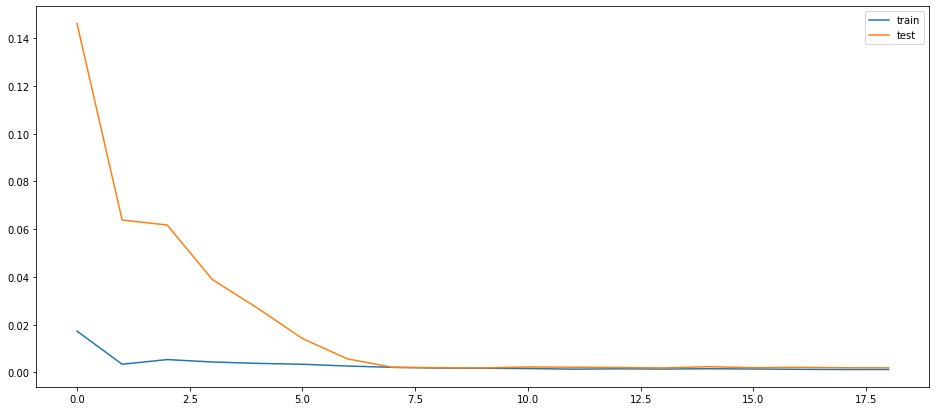

In [22]:
plt.figure(figsize=(16,7))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [23]:
# Τα μετατρέπουμε στην κανονική τους μορφή και κάνουμε τις προβλέψεις
predicted_goog_price_test_data = model_from_saved_checkpoint.predict(testX)
predicted_goog_price_test_data = scaler_test.inverse_transform(predicted_goog_price_test_data.reshape(testX.shape[0], 1))
test_actual = scaler_test.inverse_transform(testY.reshape(testX.shape[0], 1))

def rmse(predictions, targets):
    return np.sqrt(np.mean((predictions-targets)**2))

print(f"Mean Absolute Error: {mean_absolute_error(predicted_goog_price_test_data, test_actual)}")
print(f"Mean Square Error: {mean_squared_error(predicted_goog_price_test_data, test_actual)}")
print(f"r2 score: {r2_score(predicted_goog_price_test_data, test_actual)}")
print(f"Root Mean Square Error: {rmse(predicted_goog_price_test_data, test_actual)}")

Mean Absolute Error: 54.20884300353619
Mean Square Error: 4898.567432942406
r2 score: 0.6828969875321476
Root Mean Square Error: 69.98976663014678


In [24]:
# Τα μετατρέπουμε στην κανονική τους μορφή και κάνουμε τις προβλέψεις
predicted_goog_price_train_data = model_from_saved_checkpoint.predict(trainX)
predicted_goog_price_train_data = scaler_train.inverse_transform(predicted_goog_price_train_data.reshape(trainX.shape[0], 1))
train_actual = scaler_train.inverse_transform(trainY.reshape(trainY.shape[0], 1))

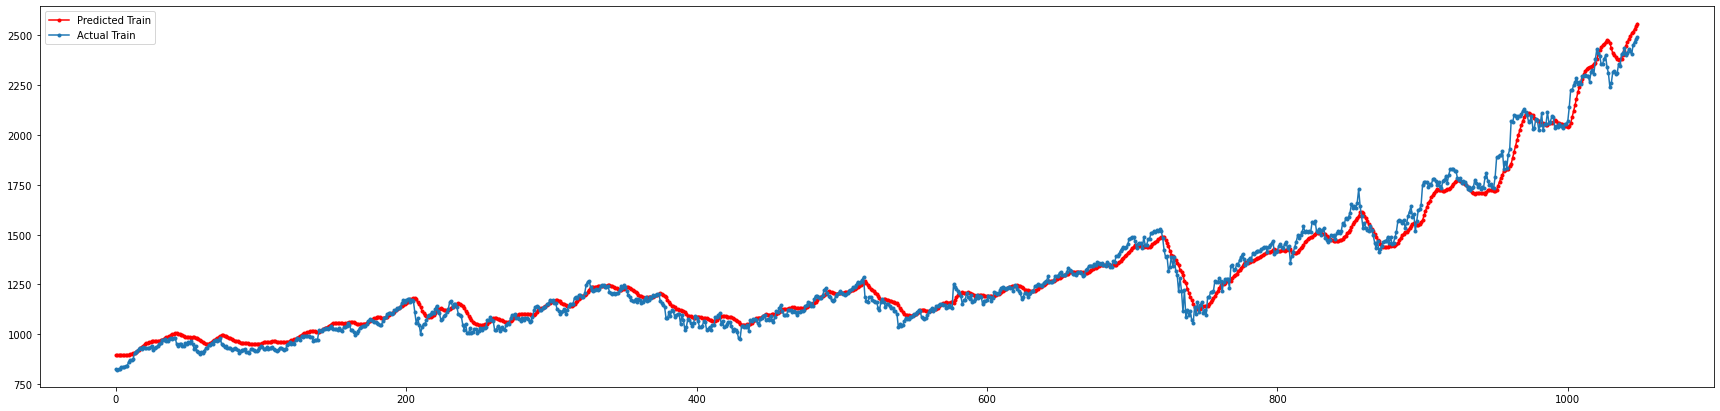

In [25]:
plt.figure(figsize=(30,7))
plt.plot(predicted_goog_price_train_data, 'r', marker='.', label='Predicted Train')
plt.plot(train_actual, marker='.', label='Actual Train')
plt.legend()
plt.show()

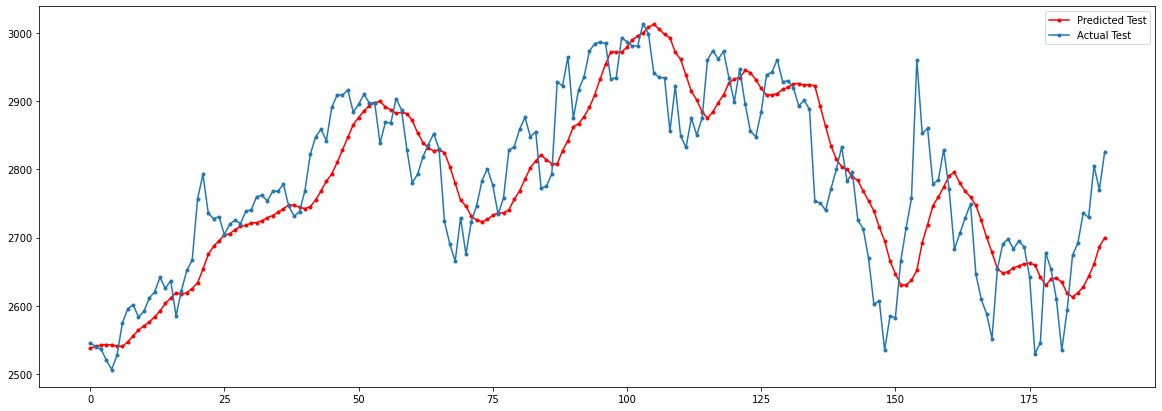

In [26]:
plt.figure(figsize=(20,7))
plt.plot(predicted_goog_price_test_data, 'r', marker='.', label='Predicted Test')
plt.plot(test_actual, marker='.', label='Actual Test')
plt.legend()
plt.show()

In [27]:
testX.shape

(190, 10, 1)

## Forecasting

In [28]:
# για να προβλέψουμε την τιμή της επ΄όμενης μέρας που δεν έχουμε στα δεδομένα μας, θα πρέπει να
# περάσουμε στο μον΄τέλο μας τις look_back μέρες και θα πάρουμε σαν output την επόμενη μέρα
# Όμοια για να πάρουμε την επόμενη μέρα από την αυριανή μέρα, θα δώσουμε σαν input στο μοντέλο μας
# τα δεδομένα των lookback - 1 μερών για να πάρουμε σαν output την μεθαυριανή μέρα
lookback_period = 15
testX_last_days = testX[testX.shape[0] - lookback_period:]
print(testX_last_days.shape)
predicted_days_forecast_price_test_x = []

for i in range(lookback_period):  
    predicted_forecast_price_test_x = model_from_saved_checkpoint.predict(testX_last_days[i:i+1])
    predicted_forecast_price_test_x = scaler_test.inverse_transform(predicted_forecast_price_test_x.reshape(-1, 1))
    predicted_days_forecast_price_test_x.append(predicted_forecast_price_test_x)

predicted_days_forecast_price_test_x = np.array(predicted_days_forecast_price_test_x)
predicted_days_forecast_price_test_x = predicted_days_forecast_price_test_x.flatten()

predicted_goog_price_test_data = predicted_goog_price_test_data.flatten()
predicted_goog_test_concatenated = np.concatenate((predicted_goog_price_test_data, predicted_days_forecast_price_test_x))


(15, 10, 1)


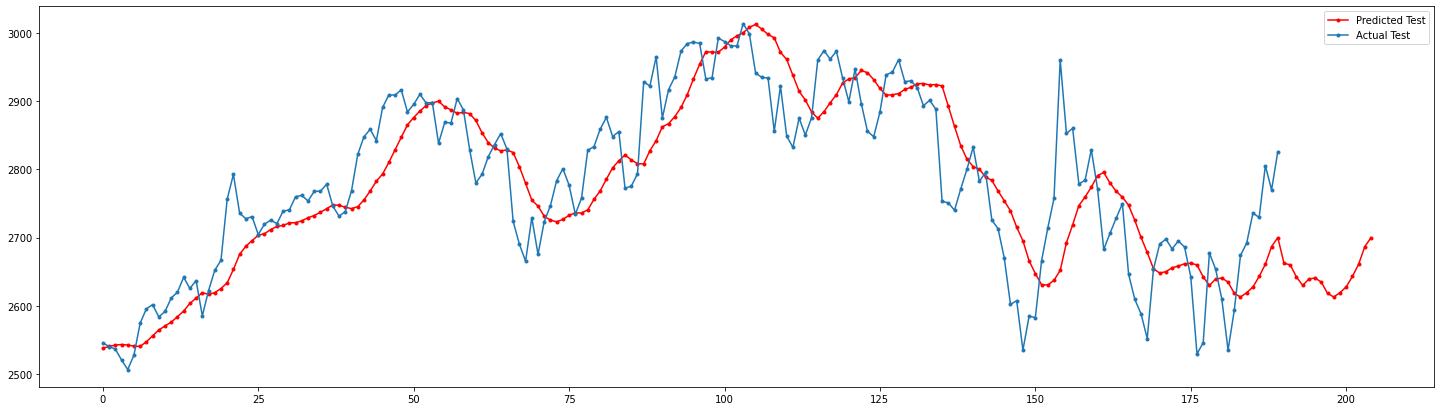

In [29]:
plt.figure(figsize=(25,7))
plt.plot(predicted_goog_test_concatenated, 'r', marker='.', label='Predicted Test')
plt.plot(test_actual, marker='.', label='Actual Test')
plt.legend()
plt.show()

## Create dataframe for our trade positions

In [30]:
df_strategy_actual = pd.DataFrame(test_actual)
df_strategy_predicted = pd.DataFrame(predicted_goog_price_test_data)

df_strategy_actual = df_strategy_actual.rename(columns={0: "close"})
df_strategy_predicted = df_strategy_predicted.rename(columns={0: "close"})

In [31]:
def classify(current, future):
    if future is None:
        return
    """
    Επιστρέφει 1 αν η τιμή στο μέλλον είναι αυξημένη ή
    -1 αν η τιμή στο μέλλον είναι μειωμένη
    """
    if float(future) > float(current):
        return 1
    elif float(future) < float(current):
        return -1

In [32]:
df_strategy_actual['future'] = df_strategy_actual["close"].shift(-1)
df_strategy_predicted['future'] = df_strategy_predicted["close"].shift(-1)
df_strategy_actual['target'] = list(map(classify, df_strategy_actual["close"], df_strategy_actual["future"]))
df_strategy_predicted['target'] = list(map(classify, df_strategy_predicted["close"], df_strategy_predicted["future"]))

frames = [df_strategy_actual, df_strategy_predicted]
result = pd.concat(frames, axis=1, ignore_index=True)
result = result.rename(columns={0: "actual_close", 
                                1:"actual_future_close", 
                                2:"actual_target",
                                3:"predicted_close",
                                4:"predicted_future_close",
                                5:"predicted_target"})
result.dropna(inplace = True)
result["prcnt_change"] = (result['predicted_future_close'] - result['predicted_close'] ) / result['predicted_close']
result.head(30)

,actual_close,actual_future_close,actual_target,predicted_close,predicted_future_close,predicted_target,prcnt_change
0,2545.639893,2539.899902,-1.0,2537.559814,2540.146729,1.0,0.001019
1,2539.899902,2536.389893,-1.0,2540.146729,2542.130859,1.0,0.000781
2,2536.389893,2520.370117,-1.0,2542.130859,2543.024658,1.0,0.000352
3,2520.370117,2506.320068,-1.0,2543.024658,2542.237793,-1.0,-0.000309
4,2506.320068,2527.370117,1.0,2542.237793,2540.577637,-1.0,-0.000653
5,2527.370117,2574.379883,1.0,2540.577637,2540.302979,-1.0,-0.000108
6,2574.379883,2595.419922,1.0,2540.302979,2546.973633,1.0,0.002626
7,2595.419922,2601.550049,1.0,2546.973633,2555.689453,1.0,0.003422
8,2601.550049,2583.540039,-1.0,2555.689453,2564.392334,1.0,0.003405
9,2583.540039,2591.489990,1.0,2564.392334,2570.272217,1.0,0.002293


## RRL Stock Trading

In [33]:
def sharpe_ratio(rets):
    return rets.mean() / rets.std()

def positions(x, theta):
    M = len(theta) - 2
    T = len(x)
    Ft = np.zeros(T)
    for t in range(M, T):
        xt = np.concatenate([[1], x[t - M:t], [Ft[t - 1]]])
        Ft[t] = np.tanh(np.dot(theta, xt))
    return Ft

def returns(Ft, x, delta=0):
    T = len(x)
    rets = Ft[0:T - 1] * x[1:T] - delta * np.abs(Ft[1:T] - Ft[0:T - 1])
    return np.concatenate([[0], rets])

def gradient(x, theta, delta):
    Ft = positions(x, theta)
    R = returns(Ft, x, delta)
    T = len(x)
    M = len(theta) - 2
    
    A = np.mean(R)
    B = np.mean(np.square(R))
    S = A / np.sqrt(B - A ** 2)

    dSdA = S * (1 + S ** 2) / A
    dSdB = -S ** 3 / 2 / A ** 2
    dAdR = 1. / T
    dBdR = 2. / T * R
    
    grad = np.zeros(M + 2)  
    dFpdtheta = np.zeros(M + 2)  
    
    for t in range(M, T):
        xt = np.concatenate([[1], x[t - M:t], [Ft[t-1]]])
        dRdF = -delta * np.sign(Ft[t] - Ft[t-1])
        dRdFp = x[t] + delta * np.sign(Ft[t] - Ft[t-1])
        dFdtheta = (1 - Ft[t] ** 2) * (xt + theta[-1] * dFpdtheta)
        dSdtheta = (dSdA * dAdR + dSdB * dBdR[t]) * (dRdF * dFdtheta + dRdFp * dFpdtheta)
        grad = grad + dSdtheta
        dFpdtheta = dFdtheta
        
    return grad, S

def train(x, epochs=2000, M=8, commission=0, learning_rate = 0.3):
    theta = np.random.rand(M + 2)
    sharpes = np.zeros(epochs) 
    for i in range(epochs):
        grad, sharpe = gradient(x, theta, commission)
        theta = theta + grad * learning_rate
        sharpes[i] = sharpe
    
    print("finished training")
    return theta, sharpes

In [34]:
rets = goog_input_df['close'].copy().diff()[1:1400]

x = np.array(rets)

N = 1240 
P = 150
x_train = x[:N]
x_test = x[-P:]

std_train = np.std(x_train)
std_test = np.std(x_test)

# mean = np.mean(x_train)

# normalize
x_train = x_train / std_train
x_test = x_test  / std_test

x_test_rrn = x_test[:]

In [35]:
rets.head()

time
2017-03-28     1.409973
2017-03-29    10.489990
2017-03-30     0.090027
2017-03-31    -1.940002
2017-04-03     8.989990
Name: close, dtype: float64

In [36]:
%%time
np.random.seed(0)
print('start training')
theta, sharpes = train(x_train, epochs=1000, M=10, commission=0, learning_rate=0.5)

start training
finished training
Wall time: 42.5 s


Sharpe ratio: 0.13253165023099028


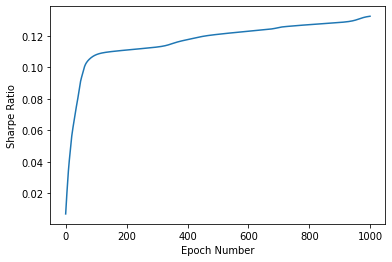

In [37]:
plt.plot(sharpes)
plt.xlabel('Epoch Number')
plt.ylabel('Sharpe Ratio')
print(f"Sharpe ratio: {sharpes[-1]}")

In [38]:
train_returns = returns(positions(x_train, theta), x_train)
test_returns = returns(positions(x_test, theta), x_test)

train_positions = positions(x_train, theta)
test_positions = positions(x_test, theta)

# for lstm predictions
x_lstm_test = np.diff(predicted_goog_price_test_data)
x_lstm_test = x_lstm_test / np.std(x_lstm_test)

lstm_returns= returns(positions(x_lstm_test, theta), x_test)
lstm_positions = positions(x_lstm_test, theta)

RL model on train data: 149.81235308483795 USD
RL model on test data: 2.842558085363133 USD
RL model on lstm predictions: -1.671017104282424 USD


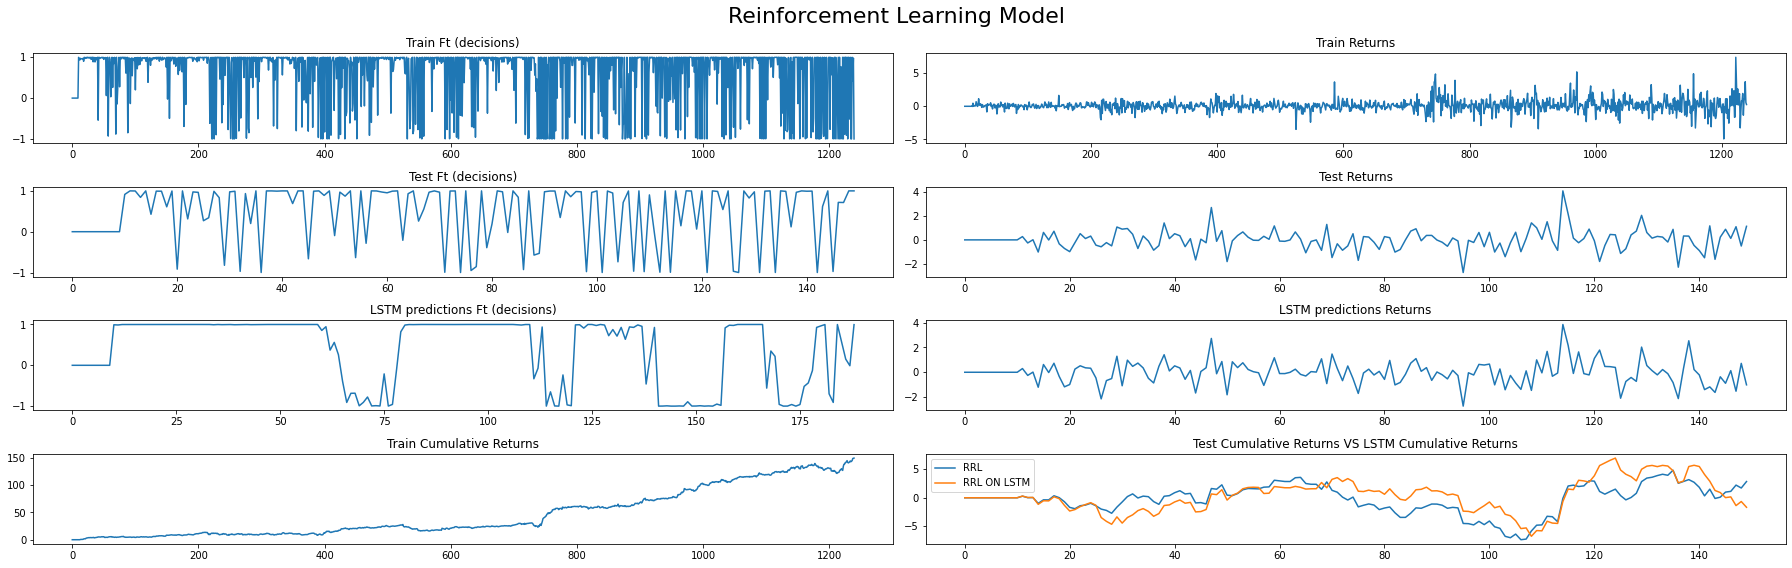

In [39]:
plt.figure(figsize=(25,8))
plt.suptitle('Reinforcement Learning Model', fontsize=22)
plt.subplot(4,2,1)
plt.plot(train_positions)
plt.title("Train Ft (decisions)")

plt.subplot(4,2,2)
plt.plot(train_returns)
plt.title("Train Returns")

plt.subplot(4,2,3)
plt.plot(test_positions)
plt.title("Test Ft (decisions)")

plt.subplot(4,2,4)
plt.plot(test_returns)
plt.title("Test Returns")

plt.subplot(4,2,5)
plt.plot(lstm_positions)
plt.title("LSTM predictions Ft (decisions)")

plt.subplot(4,2,6)
plt.plot(lstm_returns)
plt.title("LSTM predictions Returns")

plt.subplot(4,2,7)
plt.plot(train_returns.cumsum())
plt.title("Train Cumulative Returns")

plt.subplot(4,2,8)
plt.plot(test_returns.cumsum(), label= "RRL")
# plt.plot(x_test.cumsum(), label="Buy and Hold", linewidth=1)

plt.subplot(4,2,8)
plt.plot(lstm_returns.cumsum(), label= "RRL ON LSTM")
plt.title("Test Cumulative Returns VS LSTM Cumulative Returns")
plt.legend()

plt.tight_layout()

print(f"RL model on train data: {train_returns.cumsum()[-1]} USD" )
print(f"RL model on test data: {test_returns.cumsum()[-1]} USD")
print(f"RL model on lstm predictions: {lstm_returns.cumsum()[-1]} USD")

In [40]:
def trade_long(positions, stock_prices, usd=5000, goog=0, fee=0):
    """
    Αγοράζουμε για όσο προβλέπουμε πως θα ανέβει η τιμή και τα πουλάμε όλα 
    όταν προβλέπουμε πως θα πέσει η τιμή
    """
    cnt = 0
    total = []
    total.append(usd + goog * stock_prices[0])
    print(f"Start with: {total[0]}")
    for index in range(len(positions) - 1): 

        # αγοράζουμε
        if positions[index] > 0 and positions[index + 1] > 0 and usd > 0:
            buy = positions[index] * usd
            goog = buy / stock_prices[index] + goog
            usd = usd - buy - (fee * buy)
            cnt += 1
            total.append(usd + goog * stock_prices.iloc[index])
            continue

        # πουλάμε 
        if positions[index] < 0 and positions[index + 1] < 0 and goog > 0: 
            usd = goog * stock_prices[index] + usd - (fee * goog)
            goog = 0
            cnt += 1
            total.append(usd + goog * stock_prices.iloc[index])
            continue
    
    print(f"End with: {total[-1]}\nProfit: {total[-1] - total[0]}\n# of trades: {cnt}\n")
    return total

In [41]:
print("---RRL---")
total_rrl = trade_long(positions(x_test_rrn, theta), result['actual_close'].copy())
print("---RRL ON LSTM---")
total_rrl_lstm = trade_long(positions(x_lstm_test, theta), result['actual_close'].copy())
print("---LSTM---")
total_lstm = trade_long(result['prcnt_change'] * 100, result['actual_close'].copy())

---RRL---
Start with: 5000.0
End with: 4486.892465452266
Profit: -513.1075345477338
# of trades: 81

---RRL ON LSTM---
Start with: 5000.0
End with: 4952.734548228692
Profit: -47.26545177130811
# of trades: 121

---LSTM---
Start with: 5000.0
End with: 4749.502252409084
Profit: -250.49774759091633
# of trades: 100



Text(0.5, 1.0, 'PORTFOLIO')

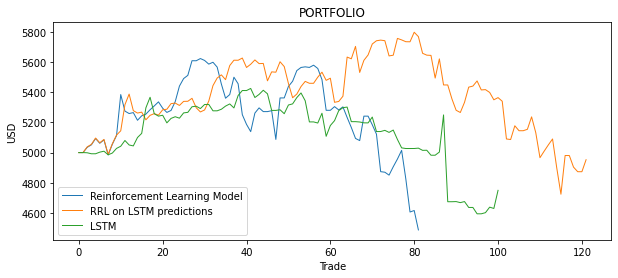

In [42]:
plt.figure(figsize=(10,4))
plt.plot(total_rrl, label="Reinforcement Learning Model", linewidth=1)
plt.plot(total_rrl_lstm, label="RRL on LSTM predictions", linewidth=1)
plt.plot(total_lstm, label="LSTM", linewidth=1)
plt.xlabel('Trade')
plt.ylabel('USD')
plt.legend()
plt.title("PORTFOLIO")

In [43]:
def trade_short(positions, stock_prices, usd=0, goog=5, fee=0):
    """
    Στην συγκεκριμένη στρατηγική πουλάμε όλα τα bitcoin που έχουμε,
    και αγοράζουμε την ίδια ποσότητα που πουλήσαμε όταν προβλέπουμε πως θα ξαναανέβει η τιμή
    """
    cnt = 0
    total = []
    total.append(usd + goog * stock_prices[0])
    short = False
    first_goog = copy.deepcopy(goog)
    print(f"Start with: {total[0]}")
    for index in range(len(positions) - 1): 
        
        if positions[index] > 0 and positions[index + 1] > 0  and usd > 0 and short and usd >= first_goog * stock_prices[index]:
            buy = copy.deepcopy(first_goog)
            goog = buy / stock_prices[index] + goog
            usd = usd - buy - (fee * buy)
            cnt += 1
            total.append(usd + goog * stock_prices.iloc[index])
            short = False
            continue

        # πουλάμε 
        if positions[index] < 0 and positions[index + 1] < 0 and goog > 0: 
            first_goog = copy.deepcopy(goog)
            usd = goog * stock_prices[index] + usd - (fee * goog)
            goog = 0
            cnt += 1
            total.append(usd + goog * stock_prices.iloc[index])
            short = True
            continue
        
    print(f"End with: {total[-1]}\nProfit: {total[-1] - total[0]}\n# of trades: {cnt}\n")
    
    return total

In [44]:
print("---RRL---")
total_rrl = trade_short(positions(x_test_rrn, theta), result['actual_close'].copy())
print("---RRL ON LSTM---")
total_rrl_lstm = trade_short(positions(x_lstm_test, theta), result['actual_close'].copy())
print("---LSTM---")
total_lstm = trade_short(result['prcnt_change'] * 100, result['actual_close'].copy())

---RRL---
Start with: 12728.199465
End with: 13671.30005
Profit: 943.1005850000001
# of trades: 2

---RRL ON LSTM---
Start with: 12728.199465
End with: 14150.207952477758
Profit: 1422.0084874777585
# of trades: 10

---LSTM---
Start with: 12728.199465
End with: 12601.850585
Profit: -126.34887999999955
# of trades: 1



Text(0.5, 1.0, 'PORTFOLIO')

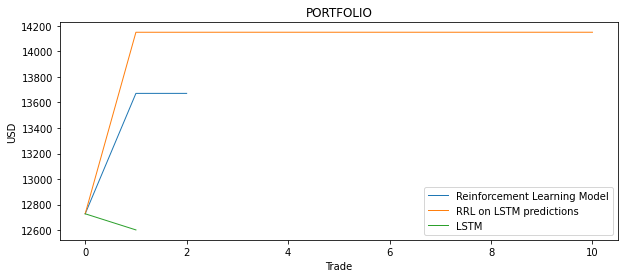

In [45]:
plt.figure(figsize=(10,4))
plt.plot(total_rrl, label="Reinforcement Learning Model", linewidth=1)
plt.plot(total_rrl_lstm, label="RRL on LSTM predictions", linewidth=1)
plt.plot(total_lstm, label="LSTM", linewidth=1)
plt.xlabel('Trade')
plt.ylabel('USD')
plt.legend()
plt.title("PORTFOLIO")